<a href="https://colab.research.google.com/github/kunal-kumar-chaudhary/Global-AI-Challenge/blob/main/Global_AI_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing our essential libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
train_data = pd.read_csv("train.csv")
train_data.head()

,Unnamed: 0,Smiles,Active
0,0,COc1ccc2[nH]cc(CCN)c2c1,False
1,1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False
2,2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False
3,3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False
4,4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False


In [56]:
test_data = pd.read_csv("test.csv")
test_data.head()

,Unnamed: 0,Smiles
0,0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...
1,1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12
2,2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O
3,3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl
4,4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...


In [57]:
!pip install rdkit-pypi -qqq

In [58]:
from rdkit.Chem import rdMolDescriptors

In [59]:
from rdkit import Chem

In [60]:
descriptor_names = list(rdMolDescriptors.Properties.GetAvailableProperties())

get_descriptors = rdMolDescriptors.Properties(descriptor_names)

In [61]:
descriptor_names

['exactmw',
 'amw',
 'lipinskiHBA',
 'lipinskiHBD',
 'NumRotatableBonds',
 'NumHBD',
 'NumHBA',
 'NumHeavyAtoms',
 'NumAtoms',
 'NumHeteroatoms',
 'NumAmideBonds',
 'FractionCSP3',
 'NumRings',
 'NumAromaticRings',
 'NumAliphaticRings',
 'NumSaturatedRings',
 'NumHeterocycles',
 'NumAromaticHeterocycles',
 'NumSaturatedHeterocycles',
 'NumAliphaticHeterocycles',
 'NumSpiroAtoms',
 'NumBridgeheadAtoms',
 'NumAtomStereoCenters',
 'NumUnspecifiedAtomStereoCenters',
 'labuteASA',
 'tpsa',
 'CrippenClogP',
 'CrippenMR',
 'chi0v',
 'chi1v',
 'chi2v',
 'chi3v',
 'chi4v',
 'chi0n',
 'chi1n',
 'chi2n',
 'chi3n',
 'chi4n',
 'hallKierAlpha',
 'kappa1',
 'kappa2',
 'kappa3',
 'Phi']

In [62]:
def smi_to_descriptors(smile):
    mol = Chem.MolFromSmiles(smile)
    descriptors = []
    if mol:
        descriptors = np.array(get_descriptors.ComputeProperties(mol))
    return descriptors

In [63]:
smi_to_descriptors(train_data["Smiles"][0])

array([190.11061307, 190.246     ,   3.        ,   3.        ,
         3.        ,   2.        ,   2.        ,  14.        ,
        28.        ,   3.        ,   0.        ,   0.27272727,
         2.        ,   2.        ,   0.        ,   0.        ,
         1.        ,   1.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
        82.87049034,  51.04      ,   1.6777    ,  57.6091    ,
         8.2092132 ,   4.68955826,   2.38826548,   2.38826548,
         1.64682994,   8.2092132 ,   4.68955826,   2.38826548,
         2.38826548,   1.64682994,  -1.48      ,   9.08983299,
         3.71708073,   1.46395692,   2.41340308])

In [64]:
train_data[[descriptor_names]] = ""

In [65]:
train_data.head()

,Unnamed: 0,Smiles,Active,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,NumAmideBonds,FractionCSP3,NumRings,NumAromaticRings,NumAliphaticRings,NumSaturatedRings,NumHeterocycles,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumSpiroAtoms,NumBridgeheadAtoms,NumAtomStereoCenters,NumUnspecifiedAtomStereoCenters,labuteASA,tpsa,CrippenClogP,CrippenMR,chi0v,chi1v,chi2v,chi3v,chi4v,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,0,COc1ccc2[nH]cc(CCN)c2c1,False,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [66]:
train_data['descriptors'] = train_data.Smiles.apply(smi_to_descriptors)

In [67]:
train_data.head()

,Unnamed: 0,Smiles,Active,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,NumAmideBonds,FractionCSP3,NumRings,NumAromaticRings,NumAliphaticRings,NumSaturatedRings,NumHeterocycles,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumSpiroAtoms,NumBridgeheadAtoms,NumAtomStereoCenters,NumUnspecifiedAtomStereoCenters,labuteASA,tpsa,CrippenClogP,CrippenMR,chi0v,chi1v,chi2v,chi3v,chi4v,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,descriptors
0,0,COc1ccc2[nH]cc(CCN)c2c1,False,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"[190.110613068, 190.24599999999995, 3.0, 3.0, ..."
1,1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"[255.138992004, 255.78900000000002, 2.0, 1.0, ..."
2,2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"[413.1157750880001, 413.4590000000002, 9.0, 2...."
3,3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"[443.16451978400005, 443.4780000000001, 6.0, 3..."
4,4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"[331.148475796, 331.394, 3.0, 2.0, 5.0, 2.0, 2..."


In [68]:
train_data['descriptors'].head()

0    [190.110613068, 190.24599999999995, 3.0, 3.0, ...
1    [255.138992004, 255.78900000000002, 2.0, 1.0, ...
2    [413.1157750880001, 413.4590000000002, 9.0, 2....
3    [443.16451978400005, 443.4780000000001, 6.0, 3...
4    [331.148475796, 331.394, 3.0, 2.0, 5.0, 2.0, 2...
Name: descriptors, dtype: object

In [69]:
for row in range(len(train_data)):
  for key, value in enumerate(train_data['descriptors'][row]):
    train_data[descriptor_names[key]][row] = value


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [70]:
train_data.head()

,Unnamed: 0,Smiles,Active,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,NumAmideBonds,FractionCSP3,NumRings,NumAromaticRings,NumAliphaticRings,NumSaturatedRings,NumHeterocycles,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumSpiroAtoms,NumBridgeheadAtoms,NumAtomStereoCenters,NumUnspecifiedAtomStereoCenters,labuteASA,tpsa,CrippenClogP,CrippenMR,chi0v,chi1v,chi2v,chi3v,chi4v,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,descriptors
0,0,COc1ccc2[nH]cc(CCN)c2c1,False,190.110613,190.246,3.0,3.0,3.0,2.0,2.0,14.0,28.0,3.0,0.0,0.272727,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,82.87049,51.04,1.6777,57.6091,8.209213,4.689558,2.388265,2.388265,1.64683,8.209213,4.689558,2.388265,2.388265,1.64683,-1.48,9.089833,3.717081,1.463957,2.413403,"[190.110613068, 190.24599999999995, 3.0, 3.0, ..."
1,1,CCCN1CCC[C@H](c2cccc(O)c2)C1.Cl,False,255.138992,255.789,2.0,1.0,3.0,1.0,2.0,17.0,39.0,3.0,0.0,0.571429,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,110.05227,23.47,3.4034,74.0608,11.248564,6.305936,3.386963,3.386963,2.625667,10.432068,6.305936,3.386963,3.386963,2.625667,-0.73,14.331463,6.87309,3.896375,5.794202,"[255.138992004, 255.78900000000002, 2.0, 1.0, ..."
2,2,O=C(NO)c1cnc(N2CCN(S(=O)(=O)c3ccc4ccccc4c3)CC2...,False,413.115775,413.459,9.0,2.0,4.0,2.0,7.0,29.0,48.0,10.0,1.0,0.210526,4.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,167.168437,115.73,1.2597,106.2045,16.210137,10.43269,6.776768,6.776768,4.72978,15.393641,8.992626,4.882131,4.882131,3.271715,-3.08,19.245735,7.740178,3.770959,5.136739,"[413.1157750880001, 413.4590000000002, 9.0, 2...."
3,3,Nc1cccc(CNC(=O)c2ccc(Oc3ccc(OCc4cccc(F)c4)cc3)...,False,443.16452,443.478,6.0,3.0,8.0,2.0,5.0,33.0,55.0,7.0,1.0,0.076923,4.0,4.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,190.361061,86.47,5.1042,123.5096,17.701741,10.288755,4.743324,4.743324,3.080538,17.701741,10.288755,4.743324,4.743324,3.080538,-4.39,21.827384,10.279784,6.300775,6.799418,"[443.16451978400005, 443.4780000000001, 6.0, 3..."
4,4,Fc1ccccc1CNCc1ccc(-c2ccnc3[nH]ccc23)cc1,False,331.148476,331.394,3.0,2.0,5.0,2.0,2.0,25.0,43.0,4.0,0.0,0.095238,4.0,4.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,145.101346,40.71,4.6588,98.4734,13.667595,8.266411,4.327533,4.327533,2.998036,13.667595,8.266411,4.327533,4.327533,2.998036,-2.98,15.542044,6.869555,3.297687,4.270677,"[331.148475796, 331.394, 3.0, 2.0, 5.0, 2.0, 2..."


In [71]:
test_data[[descriptor_names]] = ""

In [72]:
test_data['descriptors'] = test_data.Smiles.apply(smi_to_descriptors)

In [73]:
for row in range(len(test_data)):
  for key, value in enumerate(test_data['descriptors'][row]):
    test_data[descriptor_names[key]][row] = value


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
test_data.head()

,Unnamed: 0,Smiles,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,NumAmideBonds,FractionCSP3,NumRings,NumAromaticRings,NumAliphaticRings,NumSaturatedRings,NumHeterocycles,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumSpiroAtoms,NumBridgeheadAtoms,NumAtomStereoCenters,NumUnspecifiedAtomStereoCenters,labuteASA,tpsa,CrippenClogP,CrippenMR,chi0v,chi1v,chi2v,chi3v,chi4v,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi,descriptors
0,0,COC(=O)Nc1ccc(-c2nc(N3CCOCC3)c3cnn(C4CCN(Cc5cc...,528.259737,528.617,11.0,1.0,6.0,1.0,10.0,39.0,71.0,11.0,1.0,0.392857,6.0,4.0,2.0,2.0,5.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,226.319219,110.53,3.7403,147.6037,21.992704,13.323531,7.351116,7.351116,5.266717,21.992704,13.323531,7.351116,7.351116,5.266717,-4.09,25.202404,11.339826,5.545201,7.327971,"[528.2597368840002, 528.6170000000003, 11.0, 1..."
1,1,O=Cc1cn(Cc2ccc(Cl)cc2)c2ccccc12,269.060742,269.731,2.0,0.0,3.0,0.0,2.0,19.0,31.0,3.0,0.0,0.0625,3.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,115.783966,22.0,4.1555,77.8795,10.969965,6.430304,3.464525,3.464525,2.412406,10.214036,6.052339,3.212548,3.212548,2.286418,-2.06,11.998587,4.902237,2.26997,3.095785,"[269.060741684, 269.731, 2.0, 0.0, 3.0, 0.0, 2..."
2,2,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,257.101171,257.246,8.0,8.0,5.0,7.0,7.0,18.0,33.0,8.0,1.0,0.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,102.63938,148.07,-1.7562,61.48,9.420717,5.089219,2.237368,2.237368,1.15558,9.420717,5.089219,2.237368,2.237368,1.15558,-2.03,14.032617,6.052775,3.230833,4.718682,"[257.10117058000003, 257.246, 8.0, 8.0, 5.0, 7..."
3,3,Nc1nc(=O)n([C@H]2C[C@H](O)[C@@H](CO)O2)cc1Cl,261.051634,261.665,7.0,4.0,2.0,3.0,7.0,17.0,29.0,8.0,0.0,0.555556,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0,101.406242,110.6,-0.8804,59.539,9.540209,5.389549,2.919679,2.919679,1.861576,8.78428,5.011584,2.628464,2.628464,1.71418,-1.15,12.310689,4.612891,2.272281,3.340463,"[261.051633544, 261.66499999999996, 7.0, 4.0, ..."
4,4,Nc1ccc(C(=O)Nc2cccc(-c3nc(N4CCOCC4)c4oc5ncccc5...,467.170588,467.489,10.0,3.0,4.0,2.0,9.0,35.0,56.0,10.0,1.0,0.16,6.0,5.0,1.0,1.0,5.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,199.325375,132.29,3.5041,132.1756,18.640093,11.168566,5.810493,5.810493,4.06172,18.640093,11.168566,5.810493,5.810493,4.06172,-4.57,20.996174,8.65335,3.997108,5.191064,"[467.17058753200007, 467.48900000000026, 10.0,..."


In [75]:
train_data.to_csv("training data.csv")
test_data.to_csv("testing data.csv")

# DATA CLEANING/ EXPLORATORY DATA ANALYSIS

In [23]:
train_data.columns

Index(['Unnamed: 0', 'Smiles', 'Active', 'exactmw', 'amw', 'lipinskiHBA',
       'lipinskiHBD', 'NumRotatableBonds', 'NumHBD', 'NumHBA', 'NumHeavyAtoms',
       'NumAtoms', 'NumHeteroatoms', 'NumAmideBonds', 'FractionCSP3',
       'NumRings', 'NumAromaticRings', 'NumAliphaticRings',
       'NumSaturatedRings', 'NumHeterocycles', 'NumAromaticHeterocycles',
       'NumSaturatedHeterocycles', 'NumAliphaticHeterocycles', 'NumSpiroAtoms',
       'NumBridgeheadAtoms', 'NumAtomStereoCenters',
       'NumUnspecifiedAtomStereoCenters', 'labuteASA', 'tpsa', 'CrippenClogP',
       'CrippenMR', 'chi0v', 'chi1v', 'chi2v', 'chi3v', 'chi4v', 'chi0n',
       'chi1n', 'chi2n', 'chi3n', 'chi4n', 'hallKierAlpha', 'kappa1', 'kappa2',
       'kappa3', 'Phi', 'descriptors'],
      dtype='object')

In [24]:
train_data.drop(columns=["Unnamed: 0", "Smiles", "descriptors"], inplace=True)
test_data.drop(columns=["Unnamed: 0", "Smiles", "descriptors"], inplace=True)

In [25]:
train_data.head(3)

,Active,exactmw,amw,lipinskiHBA,lipinskiHBD,NumRotatableBonds,NumHBD,NumHBA,NumHeavyAtoms,NumAtoms,NumHeteroatoms,NumAmideBonds,FractionCSP3,NumRings,NumAromaticRings,NumAliphaticRings,NumSaturatedRings,NumHeterocycles,NumAromaticHeterocycles,NumSaturatedHeterocycles,NumAliphaticHeterocycles,NumSpiroAtoms,NumBridgeheadAtoms,NumAtomStereoCenters,NumUnspecifiedAtomStereoCenters,labuteASA,tpsa,CrippenClogP,CrippenMR,chi0v,chi1v,chi2v,chi3v,chi4v,chi0n,chi1n,chi2n,chi3n,chi4n,hallKierAlpha,kappa1,kappa2,kappa3,Phi
0,False,190.110613,190.246,3.0,3.0,3.0,2.0,2.0,14.0,28.0,3.0,0.0,0.272727,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,82.87049,51.04,1.6777,57.6091,8.209213,4.689558,2.388265,2.388265,1.64683,8.209213,4.689558,2.388265,2.388265,1.64683,-1.48,9.089833,3.717081,1.463957,2.413403
1,False,255.138992,255.789,2.0,1.0,3.0,1.0,2.0,17.0,39.0,3.0,0.0,0.571429,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,110.05227,23.47,3.4034,74.0608,11.248564,6.305936,3.386963,3.386963,2.625667,10.432068,6.305936,3.386963,3.386963,2.625667,-0.73,14.331463,6.87309,3.896375,5.794202
2,False,413.115775,413.459,9.0,2.0,4.0,2.0,7.0,29.0,48.0,10.0,1.0,0.210526,4.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,167.168437,115.73,1.2597,106.2045,16.210137,10.43269,6.776768,6.776768,4.72978,15.393641,8.992626,4.882131,4.882131,3.271715,-3.08,19.245735,7.740178,3.770959,5.136739


In [26]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5557 entries, 0 to 5556
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Active                           5557 non-null   bool  
 1   exactmw                          5557 non-null   object
 2   amw                              5557 non-null   object
 3   lipinskiHBA                      5557 non-null   object
 4   lipinskiHBD                      5557 non-null   object
 5   NumRotatableBonds                5557 non-null   object
 6   NumHBD                           5557 non-null   object
 7   NumHBA                           5557 non-null   object
 8   NumHeavyAtoms                    5557 non-null   object
 9   NumAtoms                         5557 non-null   object
 10  NumHeteroatoms                   5557 non-null   object
 11  NumAmideBonds                    5557 non-null   object
 12  FractionCSP3                     5

In [27]:
train_data.to_csv("modified data")

# FEATURE SCALING

seperating data into `features` and `labels`

In [28]:
data_y = train_data['Active']
data_x = train_data.drop(columns=['Active'])

let's check the distribution of classes in our dataset

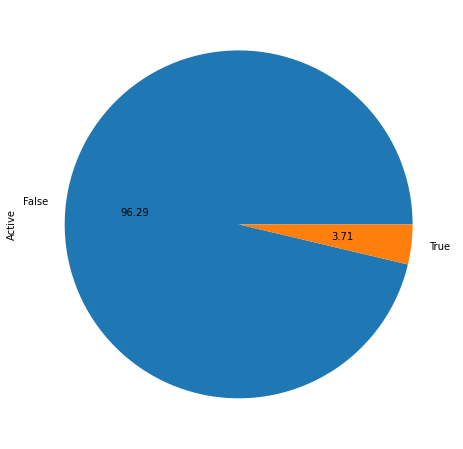

In [29]:
plt.figure(figsize=(10,8))
data_y.value_counts().plot.pie(autopct="%.2f")

let's label encode the `data_y`

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_y = le.fit_transform(data_y)
data_y

array([0, 0, 0, ..., 0, 0, 0])

let's scale our features using `standardization` technique

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_x = sc.fit_transform(data_x)
test_data = sc.fit_transform(test_data)
data_x

array([[-1.06733961e+00, -1.06817243e+00, -7.35158853e-01, ...,
        -7.86144098e-01, -4.16557477e-02, -4.65068315e-01],
       [-6.92917339e-01, -6.91127150e-01, -9.72619778e-01, ...,
        -2.15431409e-01, -2.46081672e-02, -3.71996126e-02],
       [ 2.16685935e-01,  2.15891597e-01,  6.89606695e-01, ...,
        -5.86325729e-02, -2.54871448e-02, -1.20407137e-01],
       ...,
       [-1.32677500e+00, -1.32753021e+00, -9.72619778e-01, ...,
        -1.05415885e+00, -4.54455169e-02, -6.12099770e-01],
       [ 8.73452592e-01,  8.71836372e-01, -4.97697929e-01, ...,
         4.20315742e-01, -1.13828192e-02,  1.89874943e-01],
       [-4.33691458e-01, -4.32022493e-01, -4.97697929e-01, ...,
         4.43744923e-01, -3.42208513e-04,  4.76810410e-01]])

In [32]:
test_data

array([[ 0.70895596,  0.70798623,  0.92828483, ...,  0.52425364,
         0.01516092,  0.22943563],
       [-0.54987517, -0.54844144, -0.8247398 , ..., -0.55038365,
        -0.14596105, -0.58595036],
       [-0.60795826, -0.60903375,  0.34394329, ..., -0.35832256,
        -0.09869229, -0.27327812],
       ...,
       [ 0.24267889,  0.24178704, -0.04561774, ..., -0.0660914 ,
        -0.10224775, -0.08361586],
       [-0.2920749 , -0.29298312, -0.04561774, ..., -0.22217767,
        -0.06475537, -0.32174417],
       [-0.24387053, -0.24472767, -0.24039826, ..., -0.4524403 ,
        -0.13847955, -0.54962753]])

# SPLITTING OUR DATASET INTO TRAINING AND VALIDATION SET

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data_x, data_y, test_size=0.2,
                                                  random_state = 42, stratify=data_y)

In [34]:
len(x_train), len(y_train), len(x_val), len(y_val)

(4445, 4445, 1112, 1112)

# RANDOM OVERSAMPLING

In [35]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
ruc = SMOTE(sampling_strategy=1)
""" 
this will provide us with the classes in equal ratio. 
we can change the value of sampling_strategy to change class number ratio.
"""
x_res, y_res = ruc.fit_resample(x_train, y_train)

     |████████████████████████████████| 199 kB 5.1 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [36]:
y_res

array([0, 0, 0, ..., 1, 1, 1])

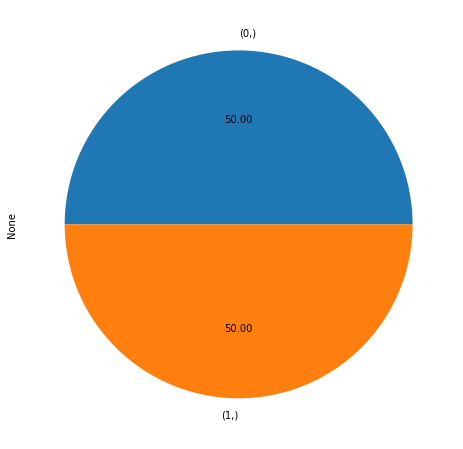

In [37]:
df = pd.DataFrame(y_res, columns = ["Active"])
plt.figure(figsize=(10,8))
df.value_counts().plot.pie(autopct="%.2f")

now, we can see above that our data is not imbalanced any more.

we only randomly oversampled our training set to deal with data imbalancement, we did not do anything with our validation data.

# Model 1: Using RUSBoostClassifier

In [38]:
from imblearn.ensemble import RUSBoostClassifier
classifier = RUSBoostClassifier(random_state=42)
classifier.fit(x_res,y_res)

RUSBoostClassifier(random_state=42)

In [39]:
from sklearn.metrics import f1_score
y_pred = classifier.predict(x_val)
f1 = f1_score(y_val, y_pred)
f1

0.14942528735632182

# Model 2: Using XGBoost

In [40]:
import xgboost as xgb
XGB = xgb.XGBClassifier()
XGB.fit(x_res, y_res)

XGBClassifier()

In [41]:
y_pred = XGB.predict(x_val)
f1 = f1_score(y_val, y_pred)
f1

0.22988505747126436

# Model 3: Using Random Forest Classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rvc = RandomForestClassifier()
rvc.fit(x_res, y_res)

RandomForestClassifier()

In [43]:
y_pred = rvc.predict(x_val)
f1 = f1_score(y_val, y_pred)
f1

0.17857142857142858

# Model 4: USING ANN

In [44]:
import tensorflow as tf
from tensorflow.keras import layers

In [45]:
len(x_res[0])

43

In [46]:
model = tf.keras.models.Sequential(
    [
     layers.Dense(8, activation="relu", input_dim = len(x_res[0])),
     layers.Dense(16, activation = "relu"),
     # adding a dropout layer
     layers.Dropout(0.5),
     layers.Dense(24, activation='relu'),
     layers.Dense(1, activation="sigmoid")
    ]
)

# compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',
                                                                           tf.keras.metrics.Precision(),
                                                                           tf.keras.metrics.Recall()
                                                                           ])

In [47]:
# let's train our model
history = model.fit(x_res, y_res, batch_size=10, epochs=20)

Epoch 1/20
856/856 [==============================] - 6s 5ms/step - loss: 0.6537 - accuracy: 0.6199 - precision: 0.6220 - recall: 0.6110
Epoch 2/20
856/856 [==============================] - 4s 5ms/step - loss: 0.5622 - accuracy: 0.7129 - precision: 0.6796 - recall: 0.8054
Epoch 3/20
856/856 [==============================] - 3s 4ms/step - loss: 0.5129 - accuracy: 0.7435 - precision: 0.7048 - recall: 0.8379
Epoch 4/20
856/856 [==============================] - 4s 5ms/step - loss: 0.4823 - accuracy: 0.7659 - precision: 0.7210 - recall: 0.8675
Epoch 5/20
856/856 [==============================] - 3s 4ms/step - loss: 0.4634 - accuracy: 0.7782 - precision: 0.7318 - recall: 0.8783
Epoch 6/20
856/856 [==============================] - 3s 3ms/step - loss: 0.4446 - accuracy: 0.7893 - precision: 0.7389 - recall: 0.8946
Epoch 7/20
856/856 [==============================] - 3s 4ms/step - loss: 0.4397 - accuracy: 0.7905 - precision: 0.7411 - recall: 0.8930
Epoch 8/20
856/856 [=====================

In [48]:
def cal_f1_score(history):
  """
  this function will take precision and recall and will return the f1-score
  """
  precision = history.history['precision'][-1]
  recall = history.history['recall'][-1]
  f1 = 2*((precision*recall)/(precision+recall))
  return f1

In [49]:
cal_f1_score(history)

0.8464149304652493

In [50]:
y_prob = model.predict(test_data)
y_prob

array([[6.9078994e-01],
       [5.2705038e-01],
       [8.0984151e-01],
       ...,
       [2.3623005e-12],
       [2.7327836e-03],
       [1.4140487e-02]], dtype=float32)

In [51]:
y_pred = tf.argmax(y_prob, axis=1)
y_pred

<tf.Tensor: shape=(1614,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 0, 0])>

In [52]:
sub = pd.read_csv("submission_2.csv")
sub.head()

FileNotFoundError: ignored

In [ ]:
sub['Active'] = y_pred

In [ ]:
sub.head()

In [ ]:
sub.drop(columns=["Unnamed: 0"], inplace=True)
sub.head()

In [ ]:
sub.to_csv("final_submission_2.csv")

In [ ]:
y_pred = XGB.predict(test_data)
y_pred

In [ ]:
sub_2 = pd.read_csv("/content/submission_3.csv")
sub_2

In [ ]:
sub_2['Active'] = y_pred

In [ ]:
sub_2.head()

In [ ]:
sub_2.drop(columns=["Unnamed: 0"], inplace=True)
sub_2.head()

In [ ]:
# sub_2.to_csv("final_submission_3.csv")